In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
classes = ['OTHER', 'SWEEPING', 'VACUUMING', 'DUSTING', 'RUBBING', 'DOWNSTAIRS', 'WALKING', 'WALKING_FAST', 'UPSTAIRS_FAST', 'UPSTAIRS']

In [3]:
X = pd.read_csv('data/ankle/X_tr_01.csv').join(pd.read_csv('data/hip/X_tr_01.csv'), rsuffix='_hip')
Y = pd.read_csv('data/ankle/Y_tr_01.csv')
XY = X.merge(Y, left_index=True, right_index=True)
XY = XY[XY['label'] != 0]
XY = XY[XY['label'] != 13]
XY = XY[XY['label'] != 14]
XY = XY[XY['label'] != 15]
XY = XY[XY['label'] != 16]
XY = XY[XY['label'] != 17]
X = XY.drop(columns = ['label'])
Y = XY['label']

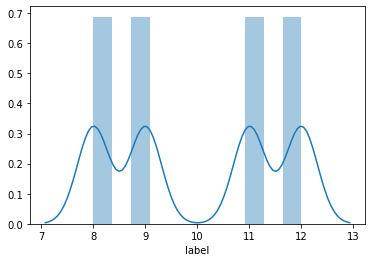

In [4]:
sns.distplot(Y)

In [5]:
X_test = pd.read_csv('data/ankle/X_ts_01.csv').join(pd.read_csv('data/hip/X_ts_01.csv'), rsuffix='_hip')
Y_test = pd.read_csv('data/ankle/Y_ts_01.csv')
XY_test = X_test.merge(Y_test, left_index=True, right_index=True)
XY_test = XY_test[XY_test['label'] != 0]
XY_test = XY_test[XY_test['label'] != 13]
XY_test = XY_test[XY_test['label'] != 14]
XY_test = XY_test[XY_test['label'] != 15]
XY_test = XY_test[XY_test['label'] != 16]
XY_test = XY_test[XY_test['label'] != 17]
X_test = XY_test.drop(columns = ['label'])
Y_test = XY_test['label']

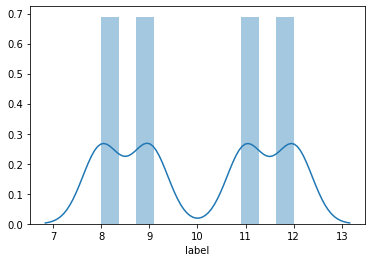

In [6]:
sns.distplot(Y_test)

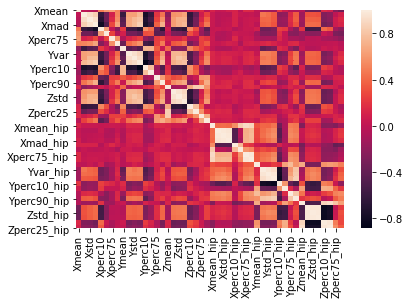

In [7]:
sns.heatmap(X.corr())

In [8]:
columns_to_drop = ['Xstd', 'Ystd', 'Zstd', 'Xmad', 'Ymad', 'Zmad', 'Xstd_hip', 'Ystd_hip', 'Zstd_hip', 'Xmad_hip', 'Ymad_hip', 'Zmad_hip']

In [9]:
X = X.drop(columns = columns_to_drop)
X_test = X_test.drop(columns = columns_to_drop)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
rf = RandomForestClassifier(max_depth=6, random_state=42)
rf.fit(X, Y)

C:\Users\Andreas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [21]:
rf.score(X_test, Y_test)

0.6663693131132917

In [22]:
Y_test_pred = rf.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[264,  11,   0,   5],
       [ 83,  87,  94,  17],
       [ 48,   7, 206,  19],
       [ 86,   4,   0, 190]], dtype=int64)

In [13]:
f1_score(Y_test, Y_test_pred, average='weighted')

0.6464121585671555

In [14]:
classes

['OTHER',
 'SWEEPING',
 'VACUUMING',
 'DUSTING',
 'RUBBING',
 'DOWNSTAIRS',
 'WALKING',
 'WALKING_FAST',
 'UPSTAIRS_FAST',
 'UPSTAIRS']

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
mlp = MLPClassifier(random_state=42, max_iter=2000).fit(X, Y)
mlp.score(X_test, Y_test)
Y_test_pred = mlp.predict(X_test)

In [16]:
confusion_matrix(Y_test, Y_test_pred)

array([[251,  11,   0,  18],
       [ 78, 100,  83,  20],
       [ 77,  13, 172,  18],
       [ 37,  46,  15, 182]], dtype=int64)

In [17]:
f1_score(Y_test, Y_test_pred, average='weighted')

0.61633200212676

In [24]:
XY

,Xmean,Xvar,Xstd,Xmad,Xperc10,Xperc25,Xperc75,Xperc90,Ymean,Yvar,...,Yperc90_hip,Zmean_hip,Zvar_hip,Zstd_hip,Zmad_hip,Zperc10_hip,Zperc25_hip,Zperc75_hip,Zperc90_hip,label
9228,-0.072651,0.119351,0.345472,0.194823,-0.492138,-0.092773,-0.036254,0.271973,-1.024299,0.076414,...,-0.857373,0.208511,0.025540,0.159811,0.141330,0.010254,0.073608,0.348145,0.421533,8.0
9229,-0.073826,0.115670,0.340102,0.191391,-0.477930,-0.093506,-0.032471,0.227490,-1.021101,0.090510,...,-0.857373,0.205554,0.024992,0.158088,0.138063,0.010254,0.073608,0.346191,0.421533,8.0
9230,-0.075217,0.115678,0.340114,0.192173,-0.477930,-0.098145,-0.032471,0.227490,-1.020422,0.090594,...,-0.860498,0.195981,0.022738,0.150791,0.127539,0.010254,0.073608,0.317749,0.386279,8.0
9231,-0.077002,0.115708,0.340159,0.193541,-0.477930,-0.103638,-0.032471,0.227490,-1.020437,0.090581,...,-0.866016,0.186047,0.020716,0.143931,0.117197,0.010254,0.073608,0.296630,0.365723,8.0
9232,-0.078547,0.115724,0.340182,0.194342,-0.477930,-0.104248,-0.032471,0.227490,-1.020669,0.090580,...,-0.873242,0.176406,0.019689,0.140316,0.110124,0.010254,0.073608,0.256103,0.362354,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15345,-0.105793,0.048413,0.220029,0.143637,-0.352734,-0.190185,-0.049316,0.183154,-1.040032,0.013058,...,-0.878662,0.315752,0.006895,0.083037,0.064581,0.226709,0.261719,0.363892,0.421923,12.0
15346,-0.113359,0.046877,0.216510,0.138092,-0.352734,-0.190185,-0.071045,0.183154,-1.042620,0.012799,...,-0.881348,0.315342,0.006738,0.082084,0.062956,0.226709,0.261719,0.357056,0.420020,12.0
15347,-0.117786,0.046153,0.214833,0.134893,-0.352734,-0.190185,-0.073242,0.183154,-1.041770,0.012785,...,-0.881348,0.311397,0.006213,0.078824,0.059052,0.226709,0.262085,0.347046,0.410791,12.0
15348,-0.118159,0.046117,0.214750,0.134628,-0.352734,-0.190185,-0.073730,0.183154,-1.038208,0.012547,...,-0.881348,0.311252,0.006205,0.078771,0.059179,0.220117,0.262085,0.347046,0.410791,12.0
